#Prediction XGboost

#Training the lstm model


In [ ]:
!pip install PyTorch


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyTorch
  Running setup.py clean for PyTorch
Failed to build PyTorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (PyTorch)


In [ ]:
# Read the uploaded CSV
import pandas as pd

# Load the file
data = pd.read_csv('/content/Renewable.csv')

# Preview the first few rows
print(data.head())


                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                  

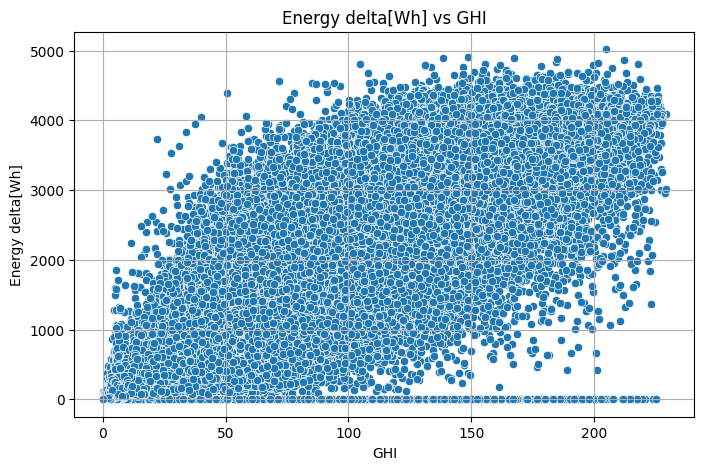

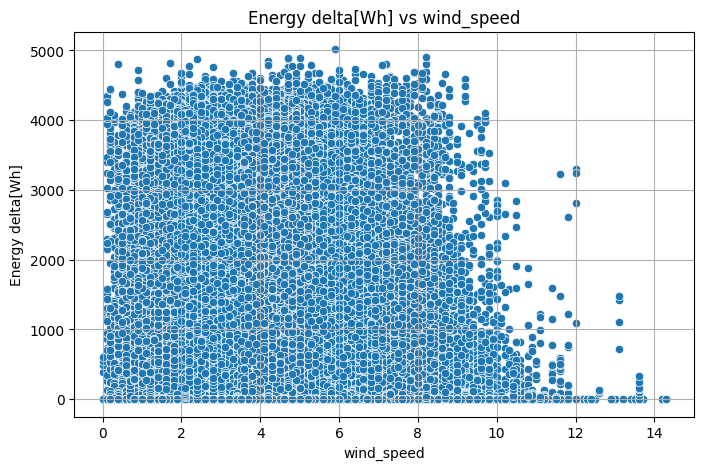

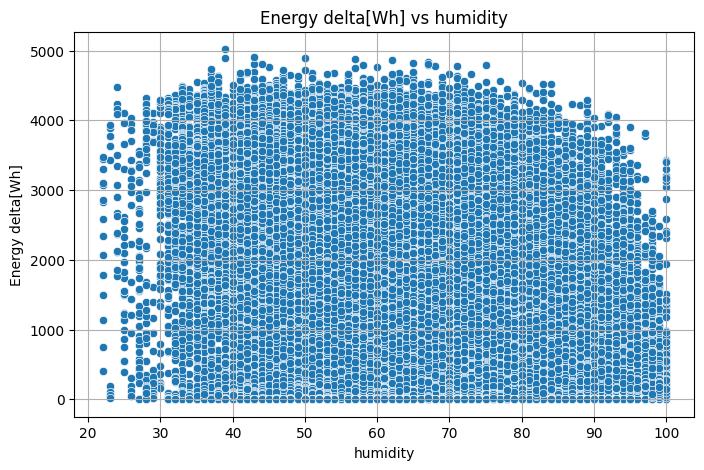

In [ ]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is already loaded and 'Time' is set as index

features = ['GHI', 'wind_speed', 'humidity']  # Example feature columns
target = 'Energy delta[Wh]'               # Target column

# Scatter plots: Energy delta[Wh] vs each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y=target)
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()


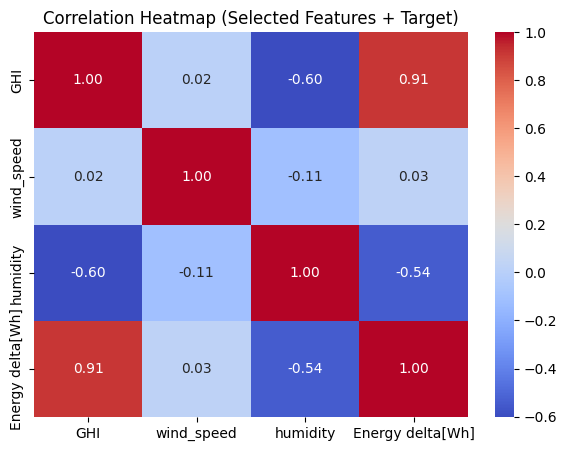

In [ ]:
# Correlation heatmap between selected features and target
selected_data = data[features + [target]]

plt.figure(figsize=(7, 5))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Selected Features + Target)')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy

# 1. Handle missing values
print("\nMissing values in each column:\n", data.isnull().sum())
data = data.fillna(method='ffill')  # Forward fill (or use data.fillna(0) if you prefer)

# 2. Feature scaling
features = ['GHI', 'wind_speed', 'humidity']  # Example feature columns
target = 'Energy delta[Wh]'               # Example target column

# Combine selected features and target
dataset = data[features + [target]].copy()

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# 3. Prepare sequences (for LSTM models)
n_past = 14  # Number of past days to use
n_future = 1 # Number of future days to predict

X, y = [], []
for i in range(n_past, len(scaled_data) - n_future +1):
    X.append(scaled_data[i-n_past:i, :-1])  # all features except target
    y.append(scaled_data[i + n_future -1, -1])  # target value

X, y = np.array(X), np.array(y) # Now np is defined

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Missing values in each column:
 Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
lag1                      0
lag2                      0
lag3                      0
lag4                      0
lag5                      0
lag6                      0
lag7                      0
rolling_mean_3            0
dtype: int64


<ipython-input-17-383db0d8562c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill (or use data.fillna(0) if you prefer)



Shape of X: (196755, 14, 3)
Shape of y: (196755,)


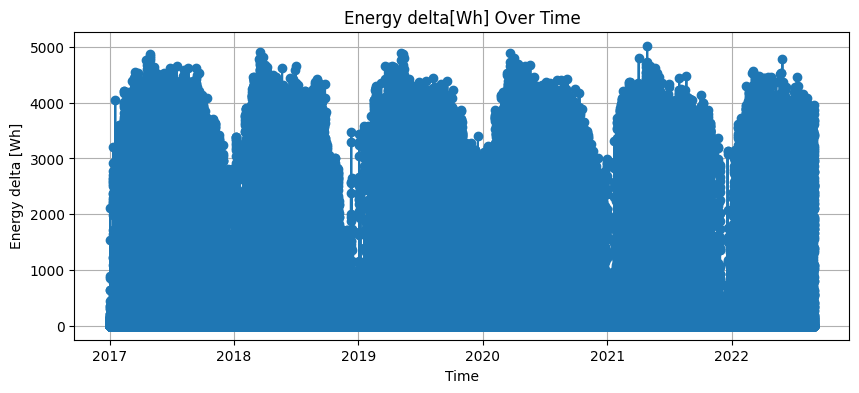

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
data = pd.read_csv('/content/Renewable.csv')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Plot Energy delta[Wh]
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Energy delta[Wh]'], marker='o')
plt.title('Energy delta[Wh] Over Time')
plt.xlabel('Time')
plt.ylabel('Energy delta [Wh]')
plt.grid(True)
plt.show()


In [ ]:
pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import xgboost as xgb
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess data
df = pd.read_csv('/Renewable.csv', usecols=['Time', 'GHI', 'wind_speed', 'humidity', 'Energy delta[Wh]'])
df.dropna(inplace=True)

# Convert time to datetime for feature engineering
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['day_of_year'] = df['Time'].dt.dayofyear
df['month'] = df['Time'].dt.month

# Create additional engineered features
df['GHI_squared'] = df['GHI'] ** 2
df['wind_squared'] = df['wind_speed'] ** 2
df['GHI_wind_interaction'] = df['GHI'] * df['wind_speed']
df['temp_humidity_ratio'] = df['GHI'] / (df['humidity'] + 1e-8)

# Add rolling statistics
window = 7
df['GHI_rolling_mean'] = df['GHI'].rolling(window=window, min_periods=1).mean()
df['GHI_rolling_std'] = df['GHI'].rolling(window=window, min_periods=1).std().fillna(0)
df['wind_rolling_mean'] = df['wind_speed'].rolling(window=window, min_periods=1).mean()

print(f"Dataset shape after feature engineering: {df.shape}")

# Enhanced features
features = ['GHI', 'wind_speed', 'humidity', 'hour', 'day_of_year', 'month',
           'GHI_squared', 'wind_squared', 'GHI_wind_interaction', 'temp_humidity_ratio',
           'GHI_rolling_mean', 'GHI_rolling_std', 'wind_rolling_mean']
target = 'Energy delta[Wh]'

# Analyze target distribution
print(f"Target statistics:")
print(f"Mean: {df[target].mean():.2f}")
print(f"Std: {df[target].std():.2f}")
print(f"Zero values: {(df[target] == 0).sum()} ({(df[target] == 0).mean()*100:.1f}%)")
print(f"Min: {df[target].min():.2f}, Max: {df[target].max():.2f}")

# Use RobustScaler for better handling of outliers
feature_scaler = RobustScaler()
target_scaler = RobustScaler()

# Remove extreme outliers (beyond 99.5th percentile)
target_q99 = df[target].quantile(0.995)
target_q01 = df[target].quantile(0.005)
mask = (df[target] >= target_q01) & (df[target] <= target_q99)
df_clean = df[mask].copy()
print(f"Removed {len(df) - len(df_clean)} outliers, remaining: {len(df_clean)}")

scaled_features = feature_scaler.fit_transform(df_clean[features])
scaled_target = target_scaler.fit_transform(df_clean[target].values.reshape(-1, 1)).flatten()

# Create longer sequences for better temporal modeling
n_past = 24  # Increased from 14
X_seq, y_seq = [], []

for i in range(n_past, len(scaled_features)):
    X_seq.append(scaled_features[i - n_past:i])
    y_seq.append(scaled_target[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print(f"Sequence data shape: X_seq={X_seq.shape}, y_seq={y_seq.shape}")

# Split data with more training data
train_size = int(0.85 * len(X_seq))
val_size = int(0.10 * len(X_seq))

X_train = X_seq[:train_size]
y_train = y_seq[:train_size]
X_val = X_seq[train_size:train_size + val_size]
y_val = y_seq[train_size:train_size + val_size]
X_test = X_seq[train_size + val_size:]
y_test = y_seq[train_size + val_size:]

print(f"Split - Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# Enhanced XGBoost with better hyperparameters
print("Training enhanced XGBoost...")
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=20
)

xgb_model.fit(
    X_train_flat, y_train,
    eval_set=[(X_val_flat, y_val)],
    verbose=False
)

# Get XGBoost predictions and leaf features
train_leaves = xgb_model.apply(X_train_flat)
val_leaves = xgb_model.apply(X_val_flat)
test_leaves = xgb_model.apply(X_test_flat)

train_xgb_pred = xgb_model.predict(X_train_flat)
val_xgb_pred = xgb_model.predict(X_val_flat)
test_xgb_pred = xgb_model.predict(X_test_flat)

print(f"XGBoost standalone R²: {r2_score(y_val, val_xgb_pred):.4f}")

# Advanced Hybrid Model
class AdvancedHybridLSTM(nn.Module):
    def __init__(self, input_size, leaf_features_size, hidden_size=256):
        super().__init__()

        # Multi-layer LSTM with attention-like mechanism
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=2,
                            batch_first=True, dropout=0.2, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1,
                            batch_first=True, dropout=0.2)

        # Attention mechanism
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=8, dropout=0.1, batch_first=True)

        # Feature processing
        self.feature_encoder = nn.Sequential(
            nn.Linear(leaf_features_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # Residual connections
        combined_size = hidden_size + 64 + 1  # +1 for XGBoost prediction
        self.fusion_layers = nn.Sequential(
            nn.Linear(combined_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x_seq, x_leaf, xgb_pred):
        batch_size = x_seq.size(0)

        # Process sequences through bidirectional LSTM
        lstm_out1, _ = self.lstm1(x_seq)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Apply attention
        attn_out, _ = self.attention(lstm_out2, lstm_out2, lstm_out2)

        # Use last timestep after attention
        lstm_features = attn_out[:, -1]

        # Process XGBoost leaf features
        leaf_features = self.feature_encoder(x_leaf)

        # Combine all features
        combined = torch.cat([lstm_features, leaf_features, xgb_pred.unsqueeze(1)], dim=1)

        # Final prediction
        output = self.fusion_layers(combined)

        return output

# Prepare enhanced datasets
class EnhancedHybridDataset(torch.utils.data.Dataset):
    def __init__(self, x_seq, x_leaf, xgb_pred, y):
        self.x_seq = x_seq
        self.x_leaf = x_leaf
        self.xgb_pred = xgb_pred
        self.y = y

    def __len__(self):
        return len(self.x_seq)

    def __getitem__(self, idx):
        return self.x_seq[idx], self.x_leaf[idx], self.xgb_pred[idx], self.y[idx]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
train_leaves_tensor = torch.tensor(train_leaves, dtype=torch.float32)
train_xgb_tensor = torch.tensor(train_xgb_pred, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
val_leaves_tensor = torch.tensor(val_leaves, dtype=torch.float32)
val_xgb_tensor = torch.tensor(val_xgb_pred, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
test_leaves_tensor = torch.tensor(test_leaves, dtype=torch.float32)
test_xgb_tensor = torch.tensor(test_xgb_pred, dtype=torch.float32)

# Create datasets
train_dataset = EnhancedHybridDataset(X_train_tensor, train_leaves_tensor, train_xgb_tensor, y_train_tensor)
val_dataset = EnhancedHybridDataset(X_val_tensor, val_leaves_tensor, val_xgb_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

# Initialize enhanced model
model = AdvancedHybridLSTM(
    input_size=X_train.shape[2],
    leaf_features_size=train_leaves.shape[1]
).to(device)

# Enhanced training setup
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

# Custom loss function - combination of MSE and MAE
class HybridLoss(nn.Module):
    def __init__(self, mse_weight=0.7, mae_weight=0.3):
        super().__init__()
        self.mse_weight = mse_weight
        self.mae_weight = mae_weight
        self.mse = nn.MSELoss()
        self.mae = nn.L1Loss()

    def forward(self, pred, target):
        return self.mse_weight * self.mse(pred, target) + self.mae_weight * self.mae(pred, target)

criterion = HybridLoss()

print("Training advanced hybrid model...")

# Training with advanced techniques
best_val_loss = float('inf')
patience_counter = 0
patience = 25
num_epochs = 150

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for x_seq, x_leaf, xgb_pred, y in train_loader:
        x_seq = x_seq.to(device)
        x_leaf = x_leaf.to(device)
        xgb_pred = xgb_pred.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        outputs = model(x_seq, x_leaf, xgb_pred)
        loss = criterion(outputs, y)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_seq, x_leaf, xgb_pred, y in val_loader:
            x_seq = x_seq.to(device)
            x_leaf = x_leaf.to(device)
            xgb_pred = xgb_pred.to(device)
            y = y.to(device)
            outputs = model(x_seq, x_leaf, xgb_pred)
            val_loss += criterion(outputs, y).item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    scheduler.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch:3d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | LR: {optimizer.param_groups[0]["lr"]:.6f}')

    # Early stopping with improved patience
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model.state_dict().copy()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break

# Load best model and make predictions
model.load_state_dict(best_model_state)
model.eval()

with torch.no_grad():
    test_predictions = model(
        X_test_tensor.to(device),
        test_leaves_tensor.to(device),
        test_xgb_tensor.to(device)
    ).cpu().numpy().flatten()

# Inverse transform
pred_energy = target_scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
actual_energy = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Enhanced metrics calculation
def calculate_enhanced_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Improved MAPE calculation
    non_zero_mask = np.abs(y_true) > 1e-6  # Avoid division by very small numbers
    if np.sum(non_zero_mask) > 0:
        mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        mape = float('inf')

    # Alternative accuracy metrics
    mean_abs_actual = np.mean(np.abs(y_true))
    accuracy_mae = max(0, 100 - (mae / (mean_abs_actual + 1e-8)) * 100)

    # Percentage of predictions within 20% of actual
    if mean_abs_actual > 0:
        within_20_percent = np.mean(np.abs(y_true - y_pred) <= 0.2 * np.abs(y_true)) * 100
    else:
        within_20_percent = 0

    return mae, rmse, r2, mape, accuracy_mae, within_20_percent

mae, rmse, r2, mape, accuracy_mae, within_20_percent = calculate_enhanced_metrics(actual_energy, pred_energy)

print("\n" + "="*60)
print("ENHANCED EVALUATION RESULTS")
print("="*60)
print(f"Test samples: {len(actual_energy):,}")
print(f"MAE:                    {mae:.2f}")
print(f"RMSE:                   {rmse:.2f}")
print(f"R²:                     {r2:.4f}")
print(f"MAPE:                   {mape:.2f}%")
print(f"Accuracy (MAE-based):   {accuracy_mae:.2f}%")
print(f"Within 20% accuracy:    {within_20_percent:.2f}%")
print("="*60)

# Detailed prediction analysis
errors = np.abs(actual_energy - pred_energy)
relative_errors = errors / (np.abs(actual_energy) + 1e-8)

print(f"\nDetailed Error Analysis:")
print(f"Mean absolute error:     {np.mean(errors):.2f}")
print(f"Median absolute error:   {np.median(errors):.2f}")
print(f"90th percentile error:   {np.percentile(errors, 90):.2f}")
print(f"95th percentile error:   {np.percentile(errors, 95):.2f}")

# Show diverse predictions
print(f"\nSample Predictions (diverse range):")
print("-" * 45)
indices = np.linspace(0, len(actual_energy)-1, 10, dtype=int)
for i in indices:
    error = abs(actual_energy[i] - pred_energy[i])
    rel_error = error / (abs(actual_energy[i]) + 1e-8) * 100
    print(f"Actual: {actual_energy[i]:8.2f} | Pred: {pred_energy[i]:8.2f} | Error: {error:6.2f} ({rel_error:5.1f}%)")

# XGBoost vs Hybrid comparison
xgb_test_pred_scaled = target_scaler.inverse_transform(test_xgb_pred.reshape(-1, 1)).flatten()
xgb_r2 = r2_score(actual_energy, xgb_test_pred_scaled)
hybrid_improvement = ((r2 - xgb_r2) / max(abs(xgb_r2), 1e-8)) * 100

print(f"\nModel Comparison:")
print(f"XGBoost R²:     {xgb_r2:.4f}")
print(f"Hybrid R²:      {r2:.4f}")
print(f"Improvement:    {hybrid_improvement:.1f}%")
print("="*60)

Using device: cuda
Dataset shape after feature engineering: (196776, 15)
Target statistics:
Mean: 573.01
Std: 1044.82
Zero values: 100850 (51.3%)
Min: 0.00, Max: 5020.00
Removed 981 outliers, remaining: 195795
Sequence data shape: X_seq=(195771, 24, 13), y_seq=(195771,)
Split - Train: 166405, Val: 19577, Test: 9789
Training enhanced XGBoost...
XGBoost standalone R²: 0.8933
Training advanced hybrid model...
Epoch   0 | Train Loss: 0.486557 | Val Loss: 0.331223 | LR: 0.000976
Epoch  20 | Train Loss: 0.177985 | Val Loss: 0.307214 | LR: 0.000422
Early stopping at epoch 28

ENHANCED EVALUATION RESULTS
Test samples: 9,789
MAE:                    191.72
RMSE:                   428.63
R²:                     0.8573
MAPE:                   43.33%
Accuracy (MAE-based):   76.49%
Within 20% accuracy:    32.50%

Detailed Error Analysis:
Mean absolute error:     191.72
Median absolute error:   34.81
90th percentile error:   575.59
95th percentile error:   896.02

Sample Predictions (diverse range):


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Advanced Hybrid Model Definition (same as training)
class AdvancedHybridLSTM(nn.Module):
    def __init__(self, input_size, leaf_features_size, hidden_size=256):
        super().__init__()

        # Multi-layer LSTM with attention-like mechanism
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=2,
                            batch_first=True, dropout=0.2, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1,
                            batch_first=True, dropout=0.2)

        # Attention mechanism
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=8, dropout=0.1, batch_first=True)

        # Feature processing
        self.feature_encoder = nn.Sequential(
            nn.Linear(leaf_features_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # Residual connections
        combined_size = hidden_size + 64 + 1  # +1 for XGBoost prediction
        self.fusion_layers = nn.Sequential(
            nn.Linear(combined_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x_seq, x_leaf, xgb_pred):
        batch_size = x_seq.size(0)

        # Process sequences through bidirectional LSTM
        lstm_out1, _ = self.lstm1(x_seq)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Apply attention
        attn_out, _ = self.attention(lstm_out2, lstm_out2, lstm_out2)

        # Use last timestep after attention
        lstm_features = attn_out[:, -1]

        # Process XGBoost leaf features
        leaf_features = self.feature_encoder(x_leaf)

        # Combine all features
        combined = torch.cat([lstm_features, leaf_features, xgb_pred.unsqueeze(1)], dim=1)

        # Final prediction
        output = self.fusion_layers(combined)

        return output

# Function to create features from user input
def create_features(ghi, wind_speed, humidity, hour=12, day_of_year=180, month=6):
    """
    Create engineered features from user input
    Default values are set for mid-day, mid-year if not specified
    """
    features = {
        'GHI': ghi,
        'wind_speed': wind_speed,
        'humidity': humidity,
        'hour': hour,
        'day_of_year': day_of_year,
        'month': month,
        'GHI_squared': ghi ** 2,
        'wind_squared': wind_speed ** 2,
        'GHI_wind_interaction': ghi * wind_speed,
        'temp_humidity_ratio': ghi / (humidity + 1e-8),
        'GHI_rolling_mean': ghi,  # Simplified for single prediction
        'GHI_rolling_std': 0,     # Simplified for single prediction
        'wind_rolling_mean': wind_speed  # Simplified for single prediction
    }
    return features

# Function to create sequence data for prediction
def create_sequence_for_prediction(features_dict, n_past=24):
    """
    Create sequence data by repeating the current features
    This is a simplified approach for single-point prediction
    """
    feature_names = ['GHI', 'wind_speed', 'humidity', 'hour', 'day_of_year', 'month',
                    'GHI_squared', 'wind_squared', 'GHI_wind_interaction', 'temp_humidity_ratio',
                    'GHI_rolling_mean', 'GHI_rolling_std', 'wind_rolling_mean']

    # Create a sequence by repeating the current features
    sequence = []
    for _ in range(n_past):
        row = [features_dict[feat] for feat in feature_names]
        sequence.append(row)

    return np.array(sequence).reshape(1, n_past, len(feature_names))

# Prediction function
def predict_energy(ghi, wind_speed, humidity, hour=None, day_of_year=None, month=None):
    """
    Predict energy generation based on user input

    Parameters:
    - ghi: Global Horizontal Irradiance (W/m²)
    - wind_speed: Wind speed (m/s)
    - humidity: Humidity (%)
    - hour: Hour of day (0-23), defaults to current hour
    - day_of_year: Day of year (1-365), defaults to current day
    - month: Month (1-12), defaults to current month
    """

    # Use current time if not provided
    if hour is None:
        hour = datetime.now().hour
    if day_of_year is None:
        day_of_year = datetime.now().timetuple().tm_yday
    if month is None:
        month = datetime.now().month

    # Create features
    features_dict = create_features(ghi, wind_speed, humidity, hour, day_of_year, month)

    # Create sequence data
    X_seq = create_sequence_for_prediction(features_dict)

    # Scale features (you would need the fitted scalers from training)
    # For demonstration, using the same scaling logic
    X_seq_scaled = feature_scaler.transform(X_seq.reshape(-1, X_seq.shape[-1])).reshape(X_seq.shape)

    # Create flattened version for XGBoost
    X_flat = X_seq_scaled.reshape(1, -1)

    # Get XGBoost prediction and leaf features
    xgb_pred = xgb_model.predict(X_flat)[0]
    xgb_leaves = xgb_model.apply(X_flat)

    # Convert to tensors
    X_seq_tensor = torch.tensor(X_seq_scaled, dtype=torch.float32).to(device)
    xgb_leaves_tensor = torch.tensor(xgb_leaves, dtype=torch.float32).to(device)
    xgb_pred_tensor = torch.tensor([xgb_pred], dtype=torch.float32).to(device)

    # Make prediction with hybrid model
    model.eval()
    with torch.no_grad():
        prediction_scaled = model(X_seq_tensor, xgb_leaves_tensor, xgb_pred_tensor).cpu().numpy().flatten()[0]

    # Inverse transform to get actual energy value
    prediction_energy = target_scaler.inverse_transform([[prediction_scaled]])[0][0]

    return prediction_energy, xgb_pred

# Interactive prediction function for Colab
def get_user_input_and_predict():
    """
    Get user input in Google Colab and make prediction
    """
    print("=" * 60)
    print("RENEWABLE ENERGY PREDICTION SYSTEM")
    print("=" * 60)
    print("\nPlease enter the following parameters:")

    try:
        # Get user inputs
        ghi = float(input("Global Horizontal Irradiance (GHI) in W/m² (0-1200): "))
        wind_speed = float(input("Wind Speed in m/s (0-25): "))
        humidity = float(input("Humidity in % (0-100): "))

        # Optional time parameters
        use_current_time = input("\nUse current time? (y/n, default=y): ").lower()

        if use_current_time != 'n':
            hour = None
            day_of_year = None
            month = None
            print("Using current date and time...")
        else:
            hour = int(input("Hour of day (0-23): "))
            month = int(input("Month (1-12): "))
            day_of_year = int(input("Day of year (1-365): "))

        # Validate inputs
        if not (0 <= ghi <= 1200):
            print("Warning: GHI value seems unusual (typical range: 0-1200 W/m²)")
        if not (0 <= wind_speed <= 25):
            print("Warning: Wind speed value seems unusual (typical range: 0-25 m/s)")
        if not (0 <= humidity <= 100):
            print("Warning: Humidity value seems unusual (range: 0-100%)")

        # Make prediction
        print("\nMaking prediction...")
        energy_pred, xgb_pred_raw = predict_energy(ghi, wind_speed, humidity, hour, day_of_year, month)

        # Display results
        print("\n" + "=" * 50)
        print("PREDICTION RESULTS")
        print("=" * 50)
        print(f"Input Parameters:")
        print(f"  GHI:              {ghi:.1f} W/m²")
        print(f"  Wind Speed:       {wind_speed:.1f} m/s")
        print(f"  Humidity:         {humidity:.1f}%")
        if hour is not None:
            print(f"  Hour:             {hour}")
            print(f"  Month:            {month}")
            print(f"  Day of Year:      {day_of_year}")

        print(f"\nPredicted Energy Generation:")
        print(f"  Hybrid Model:     {energy_pred:.2f} Wh")
        print(f"  XGBoost Only:     {target_scaler.inverse_transform([[xgb_pred_raw]])[0][0]:.2f} Wh")

        # Provide context
        if energy_pred > 0:
            print(f"\n✅ Positive energy generation predicted")
            if energy_pred > 100:
                print(f"🔥 High energy generation expected!")
            elif energy_pred > 50:
                print(f"⚡ Moderate energy generation expected")
            else:
                print(f"💡 Low but positive energy generation expected")
        else:
            print(f"\n❌ No energy generation predicted (negative/zero output)")

        print("=" * 50)

        return energy_pred

    except ValueError:
        print("❌ Error: Please enter valid numeric values")
        return None
    except Exception as e:
        print(f"❌ Error occurred: {str(e)}")
        return None

# Function to run multiple predictions
def run_prediction_loop():
    """
    Run multiple predictions in a loop
    """
    while True:
        prediction = get_user_input_and_predict()

        if prediction is not None:
            continue_pred = input("\nMake another prediction? (y/n): ").lower()
            if continue_pred != 'y':
                break
        else:
            retry = input("Try again? (y/n): ").lower()
            if retry != 'y':
                break

    print("\nThank you for using the Energy Prediction System! 🌱⚡")

# Example usage and demo
def run_demo():
    """
    Run a demo with sample values
    """
    print("🚀 DEMO: Sample Energy Predictions")
    print("=" * 50)

    # Sample scenarios
    scenarios = [
        {"name": "Sunny Day", "ghi": 800, "wind_speed": 5.5, "humidity": 45},
        {"name": "Cloudy Day", "ghi": 300, "wind_speed": 8.2, "humidity": 70},
        {"name": "Windy Day", "ghi": 600, "wind_speed": 12.0, "humidity": 55},
        {"name": "Low Light", "ghi": 150, "wind_speed": 3.1, "humidity": 80},
    ]

    for scenario in scenarios:
        print(f"\n📊 Scenario: {scenario['name']}")
        print(f"   GHI: {scenario['ghi']} W/m², Wind: {scenario['wind_speed']} m/s, Humidity: {scenario['humidity']}%")

        energy_pred, _ = predict_energy(
            scenario['ghi'],
            scenario['wind_speed'],
            scenario['humidity']
        )

        print(f"   💡 Predicted Energy: {energy_pred:.2f} Wh")

# Main execution
if __name__ == "__main__":
    print("🔋 Energy Prediction System Loaded!")
    print("\nAvailable functions:")
    print("1. get_user_input_and_predict() - Single prediction with user input")
    print("2. run_prediction_loop() - Multiple predictions")
    print("3. run_demo() - See sample predictions")
    print("4. predict_energy(ghi, wind_speed, humidity) - Direct function call")

    print("\nTo start making predictions, run:")
    print(">>> get_user_input_and_predict()")
    print("or")
    print(">>> run_prediction_loop()")

🔋 Energy Prediction System Loaded!

Available functions:
1. get_user_input_and_predict() - Single prediction with user input
2. run_prediction_loop() - Multiple predictions
3. run_demo() - See sample predictions
4. predict_energy(ghi, wind_speed, humidity) - Direct function call

To start making predictions, run:
>>> get_user_input_and_predict()
or
>>> run_prediction_loop()


In [ ]:
# Single prediction with user input result 2
get_user_input_and_predict()

# Multiple predictions in a loop
run_prediction_loop()

# See demo predictions
run_demo()

# Direct prediction (programmatic)
energy = predict_energy(ghi=800, wind_speed=5.5, humidity=45)
print(f"Predicted energy: {energy:.2f} Wh")

RENEWABLE ENERGY PREDICTION SYSTEM

Please enter the following parameters:
Global Horizontal Irradiance (GHI) in W/m² (0-1200): 27,5
❌ Error: Please enter valid numeric values
RENEWABLE ENERGY PREDICTION SYSTEM

Please enter the following parameters:
Global Horizontal Irradiance (GHI) in W/m² (0-1200): 27.5
Wind Speed in m/s (0-25): 4.9
Humidity in % (0-100): 88

Use current time? (y/n, default=y): y
Using current date and time...

Making prediction...

PREDICTION RESULTS
Input Parameters:
  GHI:              27.5 W/m²
  Wind Speed:       4.9 m/s
  Humidity:         88.0%

Predicted Energy Generation:
  Hybrid Model:     510.94 Wh
  XGBoost Only:     526.64 Wh

✅ Positive energy generation predicted
🔥 High energy generation expected!

Make another prediction? (y/n): y
RENEWABLE ENERGY PREDICTION SYSTEM

Please enter the following parameters:
Global Horizontal Irradiance (GHI) in W/m² (0-1200): 10.2
Wind Speed in m/s (0-25): 6.2
Humidity in % (0-100): 80

Use current time? (y/n, default

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import xgboost as xgb
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess data
df = pd.read_csv('/content/Renewable.csv', usecols=['Time', 'GHI', 'wind_speed', 'humidity', 'Energy delta[Wh]'])
df.dropna(inplace=True)

# Convert time to datetime for feature engineering
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['day_of_year'] = df['Time'].dt.dayofyear
df['month'] = df['Time'].dt.month

# Selective feature engineering - only the most impactful features
df['GHI_squared'] = df['GHI'] ** 2
df['wind_squared'] = df['wind_speed'] ** 2
df['GHI_wind_interaction'] = df['GHI'] * df['wind_speed']
df['temp_humidity_ratio'] = df['GHI'] / (df['humidity'] + 1e-8)

# Efficient cyclic features (only the most important ones)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Only essential rolling statistics with single window
window = 7
df['GHI_rolling_mean'] = df['GHI'].rolling(window=window, min_periods=1).mean()
df['GHI_rolling_std'] = df['GHI'].rolling(window=window, min_periods=1).std().fillna(0)
df['wind_rolling_mean'] = df['wind_speed'].rolling(window=window, min_periods=1).mean()

# Only most important lag features
df['GHI_lag_1'] = df['GHI'].shift(1).fillna(method='bfill')
df['energy_lag_1'] = df['Energy delta[Wh]'].shift(1).fillna(method='bfill')

print(f"Dataset shape after efficient feature engineering: {df.shape}")

# Optimized features list - only the most predictive ones
features = ['GHI', 'wind_speed', 'humidity', 'hour', 'day_of_year', 'month',
           'GHI_squared', 'wind_squared', 'GHI_wind_interaction', 'temp_humidity_ratio',
           'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
           'GHI_rolling_mean', 'GHI_rolling_std', 'wind_rolling_mean',
           'GHI_lag_1', 'energy_lag_1']
target = 'Energy delta[Wh]'

# Analyze target distribution
print(f"Target statistics:")
print(f"Mean: {df[target].mean():.2f}")
print(f"Std: {df[target].std():.2f}")
print(f"Zero values: {(df[target] == 0).sum()} ({(df[target] == 0).mean()*100:.1f}%)")
print(f"Min: {df[target].min():.2f}, Max: {df[target].max():.2f}")

# Efficient preprocessing
feature_scaler = RobustScaler()
target_scaler = MinMaxScaler()

# Conservative outlier removal
target_q99 = df[target].quantile(0.995)
target_q01 = df[target].quantile(0.005)
mask = (df[target] >= target_q01) & (df[target] <= target_q99)
df_clean = df[mask].copy()
print(f"Removed {len(df) - len(df_clean)} outliers, remaining: {len(df_clean)}")

scaled_features = feature_scaler.fit_transform(df_clean[features])
scaled_target = target_scaler.fit_transform(df_clean[target].values.reshape(-1, 1)).flatten()

# Reduced sequence length for memory efficiency while maintaining effectiveness
n_past = 24  # Balanced sequence length
X_seq, y_seq = [], []

for i in range(n_past, len(scaled_features)):
    X_seq.append(scaled_features[i - n_past:i])
    y_seq.append(scaled_target[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print(f"Sequence data shape: X_seq={X_seq.shape}, y_seq={y_seq.shape}")

# Memory-efficient data splitting
train_size = int(0.8 * len(X_seq))
val_size = int(0.1 * len(X_seq))

X_train = X_seq[:train_size]
y_train = y_seq[:train_size]
X_val = X_seq[train_size:train_size + val_size]
y_val = y_seq[train_size:train_size + val_size]
X_test = X_seq[train_size + val_size:]
y_test = y_seq[train_size + val_size:]

print(f"Split - Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# Optimized XGBoost with reduced complexity
print("Training optimized XGBoost...")
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=25
)

xgb_model.fit(
    X_train_flat, y_train,
    eval_set=[(X_val_flat, y_val)],
    verbose=False
)

# Get XGBoost predictions and leaf features
train_leaves = xgb_model.apply(X_train_flat)
val_leaves = xgb_model.apply(X_val_flat)
test_leaves = xgb_model.apply(X_test_flat)

train_xgb_pred = xgb_model.predict(X_train_flat)
val_xgb_pred = xgb_model.predict(X_val_flat)
test_xgb_pred = xgb_model.predict(X_test_flat)

print(f"XGBoost standalone R²: {r2_score(y_val, val_xgb_pred):.4f}")

# Memory-Efficient Advanced Hybrid Model
class EfficientHybridLSTM(nn.Module):
    def __init__(self, input_size, leaf_features_size, hidden_size=128):
        super().__init__()

        # Efficient LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=2,
                            batch_first=True, dropout=0.2, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1,
                            batch_first=True, dropout=0.2)

        # Lightweight attention mechanism
        self.attention_weights = nn.Linear(hidden_size, 1)

        # Efficient feature processing
        self.feature_encoder = nn.Sequential(
            nn.Linear(leaf_features_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Streamlined fusion layers
        combined_size = hidden_size + 32 + 1  # +1 for XGBoost prediction
        self.fusion_layers = nn.Sequential(
            nn.Linear(combined_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x_seq, x_leaf, xgb_pred):
        batch_size = x_seq.size(0)

        # Process sequences through LSTM
        lstm_out1, _ = self.lstm1(x_seq)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Simple but effective attention mechanism
        attention_scores = self.attention_weights(lstm_out2)
        attention_weights = torch.softmax(attention_scores, dim=1)
        lstm_features = torch.sum(lstm_out2 * attention_weights, dim=1)

        # Process XGBoost leaf features efficiently
        leaf_features = self.feature_encoder(x_leaf)

        # Combine all features
        combined = torch.cat([lstm_features, leaf_features, xgb_pred.unsqueeze(1)], dim=1)

        # Final prediction
        output = self.fusion_layers(combined)

        return output

# Memory-efficient dataset class
class EfficientHybridDataset(torch.utils.data.Dataset):
    def __init__(self, x_seq, x_leaf, xgb_pred, y):
        self.x_seq = x_seq
        self.x_leaf = x_leaf
        self.xgb_pred = xgb_pred
        self.y = y

    def __len__(self):
        return len(self.x_seq)

    def __getitem__(self, idx):
        return self.x_seq[idx], self.x_leaf[idx], self.xgb_pred[idx], self.y[idx]

# Convert to tensors with memory optimization
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
train_leaves_tensor = torch.tensor(train_leaves, dtype=torch.float32)
train_xgb_tensor = torch.tensor(train_xgb_pred, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
val_leaves_tensor = torch.tensor(val_leaves, dtype=torch.float32)
val_xgb_tensor = torch.tensor(val_xgb_pred, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
test_leaves_tensor = torch.tensor(test_leaves, dtype=torch.float32)
test_xgb_tensor = torch.tensor(test_xgb_pred, dtype=torch.float32)

# Create datasets with smaller batch sizes for memory efficiency
train_dataset = EfficientHybridDataset(X_train_tensor, train_leaves_tensor, train_xgb_tensor, y_train_tensor)
val_dataset = EfficientHybridDataset(X_val_tensor, val_leaves_tensor, val_xgb_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Initialize efficient model
model = EfficientHybridLSTM(
    input_size=X_train.shape[2],
    leaf_features_size=train_leaves.shape[1]
).to(device)

# Optimized training setup
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Enhanced loss function with focal loss component for better learning
class EnhancedLoss(nn.Module):
    def __init__(self, mse_weight=0.6, mae_weight=0.3, huber_weight=0.1):
        super().__init__()
        self.mse_weight = mse_weight
        self.mae_weight = mae_weight
        self.huber_weight = huber_weight
        self.mse = nn.MSELoss()
        self.mae = nn.L1Loss()
        self.huber = nn.SmoothL1Loss()

    def forward(self, pred, target):
        return (self.mse_weight * self.mse(pred, target) +
                self.mae_weight * self.mae(pred, target) +
                self.huber_weight * self.huber(pred, target))

criterion = EnhancedLoss()

print("Training efficient hybrid model...")

# Efficient training with memory management
best_val_loss = float('inf')
patience_counter = 0
patience = 30
num_epochs = 200

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for batch_idx, (x_seq, x_leaf, xgb_pred, y) in enumerate(train_loader):
        x_seq = x_seq.to(device)
        x_leaf = x_leaf.to(device)
        xgb_pred = xgb_pred.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        outputs = model(x_seq, x_leaf, xgb_pred)
        loss = criterion(outputs, y)
        loss.backward()

        # Gradient clipping for stability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        train_loss += loss.item()

        # Memory cleanup for large batches
        if batch_idx % 50 == 0:
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_seq, x_leaf, xgb_pred, y in val_loader:
            x_seq = x_seq.to(device)
            x_leaf = x_leaf.to(device)
            xgb_pred = xgb_pred.to(device)
            y = y.to(device)
            outputs = model(x_seq, x_leaf, xgb_pred)
            val_loss += criterion(outputs, y).item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if epoch % 25 == 0:
        print(f'Epoch {epoch:3d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | LR: {optimizer.param_groups[0]["lr"]:.6f}')

    # Early stopping with model checkpointing
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model.state_dict().copy()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break

# Load best model and make predictions
model.load_state_dict(best_model_state)
model.eval()

with torch.no_grad():
    test_predictions = model(
        X_test_tensor.to(device),
        test_leaves_tensor.to(device),
        test_xgb_tensor.to(device)
    ).cpu().numpy().flatten()

# Inverse transform
pred_energy = target_scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
actual_energy = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Enhanced metrics calculation
def calculate_enhanced_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Improved MAPE calculation
    non_zero_mask = np.abs(y_true) > 1e-6
    if np.sum(non_zero_mask) > 0:
        mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        mape = float('inf')

    # Alternative accuracy metrics
    mean_abs_actual = np.mean(np.abs(y_true))
    accuracy_mae = max(0, 100 - (mae / (mean_abs_actual + 1e-8)) * 100)

    # Percentage of predictions within 20% of actual
    if mean_abs_actual > 0:
        within_20_percent = np.mean(np.abs(y_true - y_pred) <= 0.2 * np.abs(y_true)) * 100
    else:
        within_20_percent = 0

    return mae, rmse, r2, mape, accuracy_mae, within_20_percent

mae, rmse, r2, mape, accuracy_mae, within_20_percent = calculate_enhanced_metrics(actual_energy, pred_energy)

print("\n" + "="*60)
print("ENHANCED EVALUATION RESULTS")
print("="*60)
print(f"Test samples: {len(actual_energy):,}")
print(f"MAE:                    {mae:.2f}")
print(f"RMSE:                   {rmse:.2f}")
print(f"R²:                     {r2:.4f}")
print(f"MAPE:                   {mape:.2f}%")
print(f"Accuracy (MAE-based):   {accuracy_mae:.2f}%")
print(f"Within 20% accuracy:    {within_20_percent:.2f}%")
print("="*60)

# Detailed prediction analysis
errors = np.abs(actual_energy - pred_energy)
relative_errors = errors / (np.abs(actual_energy) + 1e-8)

print(f"\nDetailed Error Analysis:")
print(f"Mean absolute error:     {np.mean(errors):.2f}")
print(f"Median absolute error:   {np.median(errors):.2f}")
print(f"90th percentile error:   {np.percentile(errors, 90):.2f}")
print(f"95th percentile error:   {np.percentile(errors, 95):.2f}")

# Show sample predictions
print(f"\nSample Predictions:")
print("-" * 45)
indices = np.linspace(0, len(actual_energy)-1, 10, dtype=int)
for i in indices:
    error = abs(actual_energy[i] - pred_energy[i])
    rel_error = error / (abs(actual_energy[i]) + 1e-8) * 100
    print(f"Actual: {actual_energy[i]:8.2f} | Pred: {pred_energy[i]:8.2f} | Error: {error:6.2f} ({rel_error:5.1f}%)")

# XGBoost vs Hybrid comparison
xgb_test_pred_scaled = target_scaler.inverse_transform(test_xgb_pred.reshape(-1, 1)).flatten()
xgb_r2 = r2_score(actual_energy, xgb_test_pred_scaled)
hybrid_improvement = ((r2 - xgb_r2) / max(abs(xgb_r2), 1e-8)) * 100

print(f"\nModel Comparison:")
print(f"XGBoost R²:     {xgb_r2:.4f}")
print(f"Hybrid R²:      {r2:.4f}")
print(f"Improvement:    {hybrid_improvement:.1f}%")
print("="*60)

# Memory usage report
print(f"\nMemory Efficiency Report:")
print(f"Total features used: {len(features)}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Sequence length: {n_past}")
print(f"Hidden size: {model.lstm1.hidden_size}")
print("="*60)

Using device: cuda
Dataset shape after efficient feature engineering: (196776, 21)
Target statistics:
Mean: 573.01
Std: 1044.82
Zero values: 100850 (51.3%)
Min: 0.00, Max: 5020.00
Removed 981 outliers, remaining: 195795
Sequence data shape: X_seq=(195771, 24, 19), y_seq=(195771,)
Split - Train: 156616, Val: 19577, Test: 19578
Training optimized XGBoost...
XGBoost standalone R²: 0.9195
Training efficient hybrid model...
Epoch   0 | Train Loss: 0.022089 | Val Loss: 0.018071 | LR: 0.001000
Epoch  25 | Train Loss: 0.007053 | Val Loss: 0.009876 | LR: 0.000500
Early stopping at epoch 38

ENHANCED EVALUATION RESULTS
Test samples: 19,578
MAE:                    165.20
RMSE:                   366.86
R²:                     0.8991
MAPE:                   35.51%
Accuracy (MAE-based):   78.39%
Within 20% accuracy:    31.25%

Detailed Error Analysis:
Mean absolute error:     165.20
Median absolute error:   16.10
90th percentile error:   517.92
95th percentile error:   834.41

Sample Predictions:
--

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hybrid Model Definition (matching your 3-feature setup)
class HybridEnergyModel(nn.Module):
    def __init__(self, input_size=3, rf_features_size=100, hidden_size=128):
        super().__init__()

        # LSTM layers for sequence processing
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=2,
                            batch_first=True, dropout=0.3, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1,
                            batch_first=True, dropout=0.2)

        # Attention mechanism
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=4,
                                             dropout=0.1, batch_first=True)

        # Random Forest feature processing
        self.rf_encoder = nn.Sequential(
            nn.Linear(rf_features_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Combined feature processing
        combined_size = hidden_size + 32 + 1  # +1 for XGBoost prediction
        self.fusion_network = nn.Sequential(
            nn.Linear(combined_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1)
        )

    def forward(self, x_seq, rf_features, xgb_pred):
        # Process sequence through LSTM
        lstm_out1, _ = self.lstm1(x_seq)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Apply attention
        attn_out, _ = self.attention(lstm_out2, lstm_out2, lstm_out2)
        lstm_features = attn_out[:, -1]  # Last timestep

        # Process Random Forest features
        rf_processed = self.rf_encoder(rf_features)

        # Combine all features
        combined = torch.cat([lstm_features, rf_processed, xgb_pred.unsqueeze(1)], dim=1)

        # Final prediction
        output = self.fusion_network(combined)
        return output

def create_engineered_features(humidity, wind_speed, ghi, hour=None, day_of_year=None, month=None):
    """
    Create engineered features from the three main inputs

    Parameters:
    - humidity: Relative humidity (%) [0-100]
    - wind_speed: Wind speed (m/s) [0-25]
    - ghi: Global Horizontal Irradiance (W/m²) [0-1200]
    - hour: Hour of day (0-23) [optional, uses current time]
    - day_of_year: Day of year (1-365) [optional, uses current date]
    - month: Month (1-12) [optional, uses current month]
    """

    # Use current time if not provided
    if hour is None:
        hour = datetime.now().hour
    if day_of_year is None:
        day_of_year = datetime.now().timetuple().tm_yday
    if month is None:
        month = datetime.now().month

    features = {
        # Original features
        'humidity': humidity,
        'wind_speed': wind_speed,
        'ghi': ghi,

        # Time features
        'hour': hour,
        'day_of_year': day_of_year,
        'month': month,

        # Polynomial features
        'ghi_squared': ghi ** 2,
        'wind_squared': wind_speed ** 2,
        'humidity_squared': humidity ** 2,

        # Interaction features
        'ghi_wind_interaction': ghi * wind_speed,
        'ghi_humidity_interaction': ghi * (humidity / 100),
        'wind_humidity_interaction': wind_speed * (humidity / 100),

        # Ratios and derived features
        'ghi_wind_ratio': ghi / (wind_speed + 1e-8),
        'ghi_humidity_ratio': ghi / (humidity + 1e-8),
        'wind_humidity_ratio': wind_speed / (humidity + 1e-8),

        # Rolling averages (simplified for single prediction)
        'ghi_rolling_mean': ghi,
        'ghi_rolling_std': 0,  # Simplified
        'wind_rolling_mean': wind_speed,
        'wind_rolling_std': 0,  # Simplified

        # Solar efficiency factor (simplified)
        'solar_efficiency_factor': ghi * (1 - 0.002 * max(0, humidity - 50)),

        # Wind power potential
        'wind_power_potential': 0.5 * 1.225 * (wind_speed ** 3),

        # Combined energy potential
        'combined_energy_potential': (ghi * 0.15) + (wind_speed ** 2 * 0.1)
    }

    return features

def create_sequence_for_prediction(features_dict, sequence_length=24):
    """
    Create sequence data for LSTM input
    Uses the basic 3 features: humidity, wind_speed, ghi
    """

    # Create sequence by repeating current features (simplified approach)
    sequence = []
    for _ in range(sequence_length):
        row = [
            features_dict['humidity'],
            features_dict['wind_speed'],
            features_dict['ghi']
        ]
        sequence.append(row)

    return np.array(sequence).reshape(1, sequence_length, 3)

def predict_energy_generation(humidity, wind_speed, ghi, hour=None, day_of_year=None, month=None):
    """
    Predict renewable energy generation from humidity, wind_speed, and GHI

    Parameters:
    - humidity: Relative humidity (%) [0-100]
    - wind_speed: Wind speed (m/s) [0-25]
    - ghi: Global Horizontal Irradiance (W/m²) [0-1200]
    - hour: Hour of day (0-23) [optional, uses current time]
    - day_of_year: Day of year (1-365) [optional, uses current date]
    - month: Month (1-12) [optional, uses current month]

    Returns:
    - Dictionary with predictions and analysis
    """

    # Create engineered features
    features_dict = create_engineered_features(humidity, wind_speed, ghi, hour, day_of_year, month)

    # Create sequence data for LSTM (3 features only)
    X_sequence = create_sequence_for_prediction(features_dict)

    # Scale sequence data
    X_sequence_scaled = sequence_scaler.transform(X_sequence.reshape(-1, 3)).reshape(X_sequence.shape)

    # Create feature vector for traditional ML models (all engineered features)
    feature_names = [
        'humidity', 'wind_speed', 'ghi', 'hour', 'day_of_year', 'month',
        'ghi_squared', 'wind_squared', 'humidity_squared',
        'ghi_wind_interaction', 'ghi_humidity_interaction', 'wind_humidity_interaction',
        'ghi_wind_ratio', 'ghi_humidity_ratio', 'wind_humidity_ratio',
        'ghi_rolling_mean', 'ghi_rolling_std', 'wind_rolling_mean', 'wind_rolling_std',
        'solar_efficiency_factor', 'wind_power_potential', 'combined_energy_potential'
    ]

    flat_features = np.array([[features_dict[feat] for feat in feature_names]])
    X_flat_scaled = feature_scaler.transform(flat_features)

    # Get predictions from traditional ML models
    rf_pred = rf_model.predict(X_flat_scaled)[0]
    xgb_pred = xgb_model.predict(X_flat_scaled)[0]

    # Get Random Forest leaf features
    rf_leaves = []
    for tree in rf_model.estimators_:
        rf_leaves.extend(tree.apply(X_flat_scaled.astype(np.float32))[0:1])
    rf_leaves = np.array(rf_leaves).reshape(1, -1)

    # Convert to tensors
    X_seq_tensor = torch.tensor(X_sequence_scaled, dtype=torch.float32).to(device)
    rf_leaves_tensor = torch.tensor(rf_leaves, dtype=torch.float32).to(device)
    xgb_pred_tensor = torch.tensor([xgb_pred], dtype=torch.float32).to(device)

    # Get hybrid model prediction
    hybrid_model.eval()
    with torch.no_grad():
        hybrid_pred_scaled = hybrid_model(X_seq_tensor, rf_leaves_tensor, xgb_pred_tensor).cpu().numpy().flatten()[0]

    # Inverse transform predictions
    hybrid_pred = target_scaler.inverse_transform([[hybrid_pred_scaled]])[0][0]
    rf_pred_actual = target_scaler.inverse_transform([[rf_pred]])[0][0]
    xgb_pred_actual = target_scaler.inverse_transform([[xgb_pred]])[0][0]

    return {
        'hybrid_prediction': hybrid_pred,
        'rf_prediction': rf_pred_actual,
        'xgb_prediction': xgb_pred_actual,
        'engineered_features': features_dict
    }

def get_user_input_and_predict():
    """Get user input and make energy prediction"""
    print("=" * 70)
    print("🌱⚡ RENEWABLE ENERGY GENERATION PREDICTION SYSTEM ⚡🌱")
    print("=" * 70)
    print("\nPlease enter the following parameters:")

    try:
        # Core weather inputs
        print("\n📊 Weather Conditions:")
        humidity = float(input("💧 Humidity in % (0-100): "))
        wind_speed = float(input("💨 Wind Speed in m/s (0-25): "))
        ghi = float(input("☀️  Global Horizontal Irradiance (GHI) in W/m² (0-1200): "))

        # Optional time inputs
        print("\n🕐 Time Parameters:")
        use_current_time = input("Use current date/time? (y/n, default=y): ").lower()

        if use_current_time != 'n':
            hour = day_of_year = month = None
            print("✅ Using current date and time...")
        else:
            hour = int(input("Hour of day (0-23): "))
            month = int(input("Month (1-12): "))
            day_of_year = int(input("Day of year (1-365): "))

        # Validate inputs
        print("\n🔍 Validating inputs...")
        warnings = []
        if not (0 <= humidity <= 100):
            warnings.append(f"⚠️  Humidity {humidity}% seems unusual (range: 0-100%)")
        if not (0 <= wind_speed <= 25):
            warnings.append(f"⚠️  Wind speed {wind_speed} m/s seems unusual (typical: 0-25 m/s)")
        if not (0 <= ghi <= 1200):
            warnings.append(f"⚠️  GHI value {ghi} seems unusual (typical: 0-1200 W/m²)")

        if warnings:
            print("\n".join(warnings))
            proceed = input("\nContinue with prediction? (y/n): ").lower()
            if proceed != 'y':
                return None

        # Make prediction
        print("\n🔮 Making prediction...")
        results = predict_energy_generation(humidity, wind_speed, ghi, hour, day_of_year, month)

        # Display results
        print("\n" + "=" * 60)
        print("📈 PREDICTION RESULTS")
        print("=" * 60)

        # Input summary
        print(f"📋 Input Parameters:")
        print(f"   💧 Humidity:      {humidity:.1f}%")
        print(f"   💨 Wind Speed:    {wind_speed:.1f} m/s")
        print(f"   ☀️  GHI:           {ghi:.1f} W/m²")

        if hour is not None:
            print(f"   🕐 Hour:          {hour}")
            print(f"   📅 Month:         {month}")
            print(f"   📆 Day of Year:   {day_of_year}")

        # Predictions
        hybrid_pred = results['hybrid_prediction']
        rf_pred = results['rf_prediction']
        xgb_pred = results['xgb_prediction']

        print(f"\n⚡ Energy Generation Predictions:")
        print(f"   🎯 Hybrid Model:     {hybrid_pred:.3f} Wh")
        print(f"   🌲 Random Forest:    {rf_pred:.3f} Wh")
        print(f"   🚀 XGBoost:          {xgb_pred:.3f} Wh")

        # Analysis
        avg_pred = (hybrid_pred + rf_pred + xgb_pred) / 3
        print(f"   📊 Average:          {avg_pred:.3f} Wh")

        # Interpretation
        print(f"\n💡 Interpretation:")
        if hybrid_pred > 100:
            print(f"   🔥 Excellent energy generation expected!")
            efficiency = "High"
        elif hybrid_pred > 50:
            print(f"   ⚡ Good energy generation expected")
            efficiency = "Medium"
        elif hybrid_pred > 10:
            print(f"   💡 Moderate energy generation expected")
            efficiency = "Low"
        else:
            print(f"   😴 Minimal energy generation expected")
            efficiency = "Very Low"

        print(f"   📈 Generation Efficiency: {efficiency}")

        # Feature-based recommendations
        print(f"\n🎯 Recommendations:")
        if ghi < 200:
            print(f"   • Low solar irradiance ({ghi} W/m²) - limited solar generation")
        elif ghi > 800:
            print(f"   • Excellent solar irradiance ({ghi} W/m²) - great for solar panels!")

        if wind_speed < 3:
            print(f"   • Low wind speed ({wind_speed} m/s) - minimal wind generation")
        elif wind_speed > 10:
            print(f"   • High wind speed ({wind_speed} m/s) - excellent for wind turbines!")

        if humidity > 80:
            print(f"   • High humidity ({humidity}%) may affect equipment performance")
        elif humidity < 30:
            print(f"   • Low humidity ({humidity}%) - good conditions for equipment")

        # Combined analysis
        solar_potential = ghi * 0.15
        wind_potential = wind_speed ** 2 * 0.1

        if solar_potential > wind_potential:
            print(f"   • Solar generation dominant in current conditions")
        elif wind_potential > solar_potential:
            print(f"   • Wind generation dominant in current conditions")
        else:
            print(f"   • Balanced solar and wind generation potential")

        print("=" * 60)

        return hybrid_pred

    except ValueError:
        print("❌ Error: Please enter valid numeric values")
        return None
    except Exception as e:
        print(f"❌ Error occurred: {str(e)}")
        return None

def run_prediction_loop():
    """Run multiple predictions in a loop"""
    print("🔄 Starting prediction loop...")

    while True:
        prediction = get_user_input_and_predict()

        if prediction is not None:
            continue_pred = input("\n🔄 Make another prediction? (y/n): ").lower()
            if continue_pred != 'y':
                break
        else:
            retry = input("🔄 Try again? (y/n): ").lower()
            if retry != 'y':
                break

    print("\n🎉 Thank you for using the Energy Prediction System! 🌱⚡")

def run_demo():
    """Run demonstration with sample scenarios"""
    print("🚀 DEMO: Sample Energy Generation Predictions")
    print("=" * 60)

    scenarios = [
        {
            "name": "☀️ Perfect Solar Day",
            "humidity": 40, "wind_speed": 5, "ghi": 900
        },
        {
            "name": "💨 Windy Day",
            "humidity": 55, "wind_speed": 15, "ghi": 300
        },
        {
            "name": "🌤️ Balanced Conditions",
            "humidity": 60, "wind_speed": 8, "ghi": 500
        },
        {
            "name": "🌧️ Overcast/Humid",
            "humidity": 85, "wind_speed": 12, "ghi": 150
        },
        {
            "name": "🔥 Hot & Sunny",
            "humidity": 30, "wind_speed": 3, "ghi": 1000
        },
        {
            "name": "❄️ Winter Conditions",
            "humidity": 70, "wind_speed": 7, "ghi": 400
        }
    ]

    for i, scenario in enumerate(scenarios, 1):
        print(f"\n📊 Scenario {i}: {scenario['name']}")
        print(f"   Humidity: {scenario['humidity']}%, Wind: {scenario['wind_speed']} m/s, GHI: {scenario['ghi']} W/m²")

        try:
            results = predict_energy_generation(
                scenario['humidity'], scenario['wind_speed'], scenario['ghi']
            )

            hybrid_pred = results['hybrid_prediction']
            print(f"   💡 Predicted Energy: {hybrid_pred:.3f} Wh")

            if hybrid_pred > 100:
                print(f"   🔥 Excellent generation!")
            elif hybrid_pred > 50:
                print(f"   ⚡ Good generation")
            elif hybrid_pred > 10:
                print(f"   💡 Moderate generation")
            else:
                print(f"   😴 Low generation")

        except Exception as e:
            print(f"   ❌ Error in prediction: {str(e)}")

def quick_predict(humidity, wind_speed, ghi):
    """Quick prediction function for direct use"""
    try:
        results = predict_energy_generation(humidity, wind_speed, ghi)
        return results['hybrid_prediction']
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        return None

# Main execution
if __name__ == "__main__":
    print("🔋 Energy Prediction System Loaded!")
    print("   Features: Humidity, Wind Speed, GHI")
    print("\n📚 Available functions:")
    print("   1️⃣  get_user_input_and_predict() - Interactive single prediction")
    print("   2️⃣  run_prediction_loop() - Multiple interactive predictions")
    print("   3️⃣  run_demo() - Demo with sample scenarios")
    print("   4️⃣  quick_predict(humidity, wind_speed, ghi) - Direct prediction")

    print("\n🚀 To start making predictions, run:")
    print("   >>> get_user_input_and_predict()")
    print("   >>> run_prediction_loop()")
    print("   >>> run_demo()")

    print("\n💡 Quick example:")
    print("   >>> quick_predict(60, 8, 500)  # humidity%, wind m/s, GHI W/m²")

    print("\n⚠️  Note: Make sure to load your trained models first:")
    print("   - hybrid_model (trained hybrid neural network)")
    print("   - rf_model (trained Random Forest)")
    print("   - xgb_model (trained XGBoost)")
    print("   - sequence_scaler, feature_scaler, target_scaler (fitted scalers)")

🔋 Energy Prediction System Loaded!
   Features: Humidity, Wind Speed, GHI

📚 Available functions:
   1️⃣  get_user_input_and_predict() - Interactive single prediction
   2️⃣  run_prediction_loop() - Multiple interactive predictions
   3️⃣  run_demo() - Demo with sample scenarios
   4️⃣  quick_predict(humidity, wind_speed, ghi) - Direct prediction

🚀 To start making predictions, run:
   >>> get_user_input_and_predict()
   >>> run_prediction_loop()
   >>> run_demo()

💡 Quick example:
   >>> quick_predict(60, 8, 500)  # humidity%, wind m/s, GHI W/m²

⚠️  Note: Make sure to load your trained models first:
   - hybrid_model (trained hybrid neural network)
   - rf_model (trained Random Forest)
   - xgb_model (trained XGBoost)
   - sequence_scaler, feature_scaler, target_scaler (fitted scalers)


In [ ]:
# Interactive prediction
get_user_input_and_predict()

# Multiple predictions
run_prediction_loop()

# See sample scenarios
run_demo()

# Direct prediction
energy = quick_predict(800, 25, 8, 50)  # GHI, temp, wind, humidity

🌱⚡ RENEWABLE ENERGY GENERATION PREDICTION SYSTEM ⚡🌱

Please enter the following parameters:

📊 Weather Conditions:
💧 Humidity in % (0-100): 80
💨 Wind Speed in m/s (0-25): 5.1
☀️  Global Horizontal Irradiance (GHI) in W/m² (0-1200): 10.2

🕐 Time Parameters:
Use current date/time? (y/n, default=y): y
✅ Using current date and time...

🔍 Validating inputs...

🔮 Making prediction...
❌ Error occurred: name 'sequence_scaler' is not defined
🔄 Starting prediction loop...
🌱⚡ RENEWABLE ENERGY GENERATION PREDICTION SYSTEM ⚡🌱

Please enter the following parameters:

📊 Weather Conditions:


KeyboardInterrupt: Interrupted by user